# Network Delay Time

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

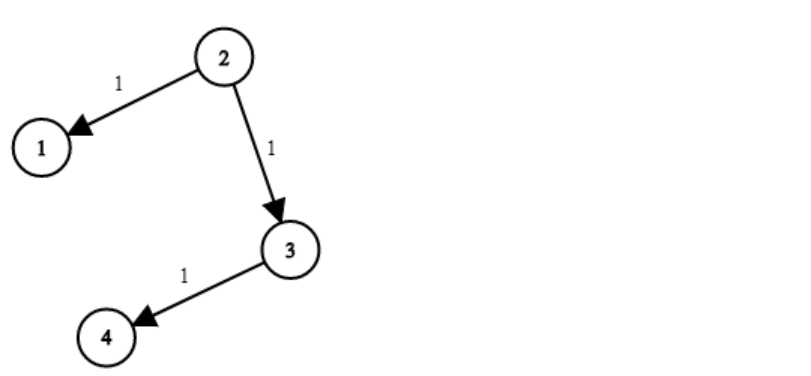

Example 1:

```
Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2
```

Example 2:

```
Input: times = [[1,2,1]], n = 2, k = 1
Output: 1
```

Example 3:

```
Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
```

Constraints:

```
1 <= k <= n <= 100
1 <= times.length <= 6000
times[i].length == 3
1 <= ui, vi <= n
ui != vi
0 <= wi <= 100
All the pairs (ui, vi) are unique. (i.e., no multiple edges.)
```

In [7]:
from collections import defaultdict
import heapq

class Solution:
    def networkDelayTime(self, times, n, k):
        graph = defaultdict(list)
        for src, dest, time in times:
            graph[src].append([dest, time])
        
        minheap = [[0, k]]
        visited = set()
        ans = 0
        while len(minheap) > 0:
            if len(visited) == n:
                break
            time, node = heapq.heappop(minheap)
            if node not in visited:
                ans = time
                visited.add(node)
                for cn, ct in graph[node]:
                    heapq.heappush(minheap, [ct + time, cn])
        
        if len(visited) == n:
            return ans
        else:
            return -1

In [9]:
times = [[2,1,1],[2,3,1],[3,4,1]]
n = 4
k = 2

expected = 2
output = Solution().networkDelayTime(times, n, k)
print(output)
assert output == expected





2


In [10]:
times = [[1,2,1]]
n = 2
k = 1

expected = 1
output = Solution().networkDelayTime(times, n, k)
print(output)
assert output == expected

1


In [11]:
times = [[1,2,1]]
n = 2
k = 2

expected = -1
output = Solution().networkDelayTime(times, n, k)
print(output)
assert output == expected

-1
